<a href="https://colab.research.google.com/github/Rumeysakeskin/Image-Classification-InceptionV3/blob/main/trasfer_learning_Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INCEPTION V3


In [1]:
import keras
import os
import numpy as np
import tensorflow as tf
import cv2
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from tensorflow.keras import optimizers
import cv2

base_model = applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model.summary()

# Define a callback to stop training when accuracy exceeds 99.4% and save the model
class StopTrainingAndSaveModelCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.994:
            print("\nReached 99.4% accuracy. Stopping training and saving the model.")
            self.model.stop_training = True
            self.model.save('ECG_inception.h5')

checkpoint = tf.keras.callbacks.ModelCheckpoint('ECG_inception.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=False,
                             period=1,
                             verbose=1)

callbacks = [StopTrainingAndSaveModelCallback(), checkpoint]
epochs = 15
batch_size = 32
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    epochs=epochs,
    callbacks=callbacks
)



Found 15341 images belonging to 6 classes.
Found 6825 images belonging to 6 classes.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

C:\Users\bhanu\AppData\Local\Temp\ipykernel_10804\2574557172.py:80: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
479/479 [==============================] - ETA: 0s - loss: 0.4440 - accuracy: 0.8511
Epoch 1: saving model to ECG_inception.h5


C:\Users\bhanu\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


479/479 [==============================] - 1579s 3s/step - loss: 0.4440 - accuracy: 0.8511 - val_loss: 0.4455 - val_accuracy: 0.8539
Epoch 2/15
479/479 [==============================] - ETA: 0s - loss: 0.1460 - accuracy: 0.9528
Epoch 2: saving model to ECG_inception.h5
479/479 [==============================] - 1408s 3s/step - loss: 0.1460 - accuracy: 0.9528 - val_loss: 0.3849 - val_accuracy: 0.8724
Epoch 3/15
479/479 [==============================] - ETA: 0s - loss: 0.1046 - accuracy: 0.9668
Epoch 3: saving model to ECG_inception.h5
479/479 [==============================] - 1408s 3s/step - loss: 0.1046 - accuracy: 0.9668 - val_loss: 0.3772 - val_accuracy: 0.8744
Epoch 4/15
479/479 [==============================] - ETA: 0s - loss: 0.0864 - accuracy: 0.9732
Epoch 4: saving model to ECG_inception.h5
479/479 [==============================] - 1381s 3s/step - loss: 0.0864 - accuracy: 0.9732 - val_loss: 0.4889 - val_accuracy: 0.8555
Epoch 5/15
479/479 [==============================] - 

In [20]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


214/214 [==============================] - 236s 1s/step - loss: 0.5138 - accuracy: 0.8607
Test accuracy: 86.07%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


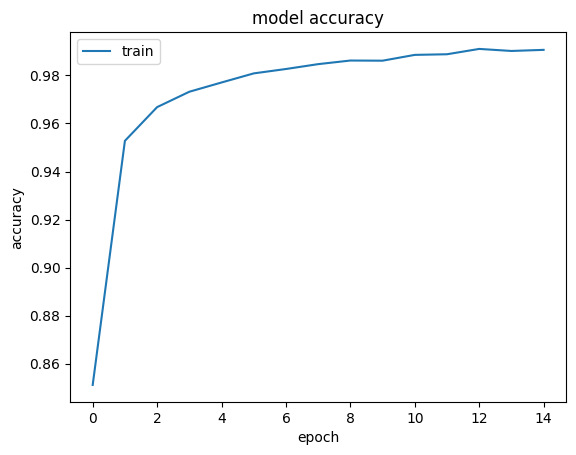

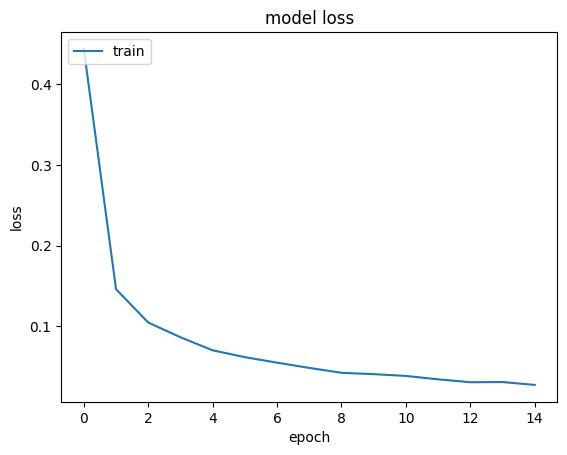

In [14]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

plt.show()

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


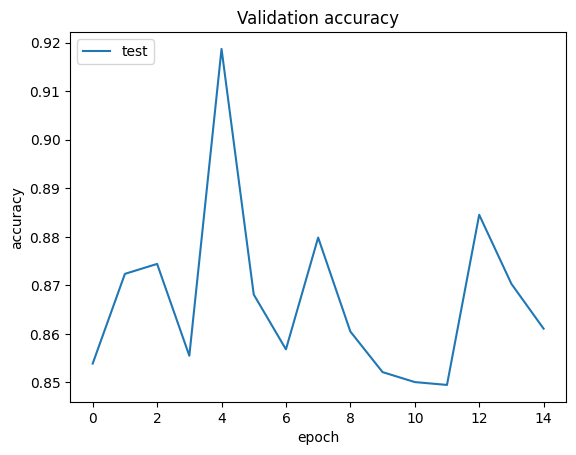

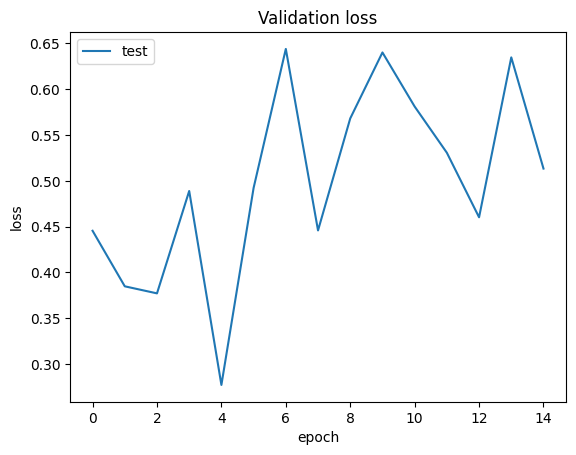

In [17]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_accuracy'])

plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test'], loc='upper left')

plt.show()